<a href="https://colab.research.google.com/github/YangYangJiJi/2025_Artificial_Intelligent/blob/main/kmeans/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


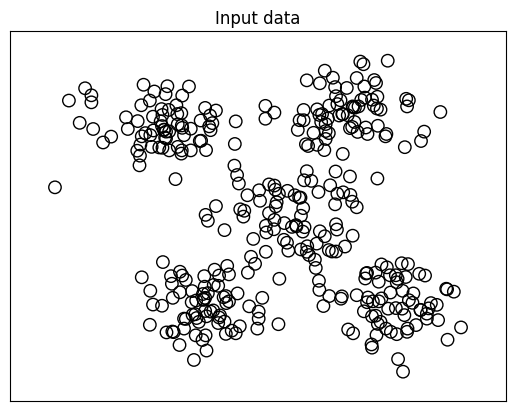

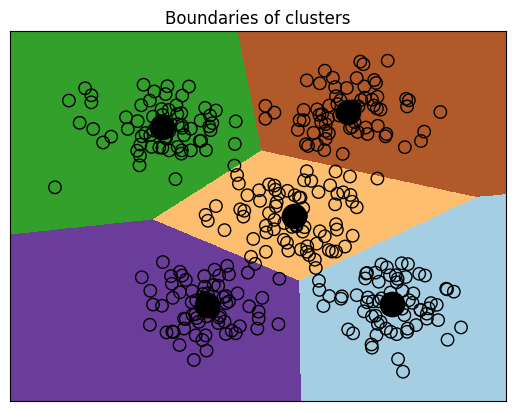

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans  # Scikit-Learn에서 K-means Clustering을 수행하는 함수 제공

# Load input data
X = np.loadtxt('/content/drive/MyDrive/data_clustering.txt', delimiter=',')  # *** 여기에 data_clustering.txt 파일의 경로를 본인 구글드라이브 경로에 맞추어 바꾸기(새로 만든 폴더명이 'Kmeansclustering'이면 변경하지 않아도 됨.)
num_clusters = 5  # 군집화 할 군집의 개수

# Plot input data - 입력 데이터 시각화
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none',
        edgecolors='black', s=80)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# Create KMeans object
kmeans = KMeans(init='random', n_clusters=num_clusters, n_init=1)  # K-means Clustering 초기화
                                                                    # init: 초기 중심점 설정 방법(random or k-means++) / n_clusters: 군집 개수 / n_init: 군집화 작업 반복 횟수

# Train the KMeans clustering model
kmeans.fit(X)

# Step size of the mesh
step_size = 0.01  # np.arrange에서 array 형태를 반환할 때, [start, stop)에서 step_size만큼 일정하게 떨어져 있는 숫자들을 반환

# Define the grid of points to plot the boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size),
        np.arange(y_min, y_max, step_size))  # np.meshgrid로 직사각형 격자 생성 -> 군집 경계를 표시하기 위해 사용

# Predict output labels for all the points on the grid
output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

# 군집 시각화 - 군집 경계를 표시, 군집별 중심점 표시
# Plot different regions and color them
output = output.reshape(x_vals.shape)
plt.figure()
plt.clf()
plt.imshow(output, interpolation='nearest',
           extent=(x_vals.min(), x_vals.max(),
               y_vals.min(), y_vals.max()),
           cmap=plt.cm.Paired,
           aspect='auto',
           origin='lower')  # 군집별 다른 색상 표시, 즉 군집 경계 시각화

# Overlay input points
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none',
        edgecolors='black', s=80)  # 입력 데이터 표시

# Plot the centers of clusters
cluster_centers = kmeans.cluster_centers_  # 군집별 중심점 좌표값 반환
plt.scatter(cluster_centers[:,0], cluster_centers[:,1],
        marker='o', s=210, linewidths=4, color='black',
        zorder=12, facecolors='black')  # 군집별 중심점 시각화

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Boundaries of clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()